In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [36]:
# Data Generation
np.random.seed(42)
x = np.random.rand(10, 1)
y = 1 + 2 * x + .1 * np.random.randn(10, 1)

# Shuffles the indices
idx = np.arange(10)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]

# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

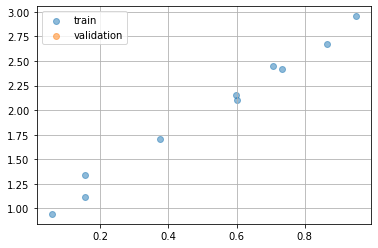

In [37]:
# Plot  
fig, ax = plt.subplots()  

ax.scatter(x_train, y_train, color='C0', label='train', alpha=0.5)  
ax.scatter(x_val, y_val, color = 'C1', label='validation', alpha=0.5)  
ax.legend()  
ax.grid(True)  

In [29]:
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print(a, b)

# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train

    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()

    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad

print(a, b)

# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]
[1.02354075] [1.96896447]
